# Exploratory Data Analysis - Sales Product

**Data Analyst**: Amanda Barbosa

Project developed for the course Data Analysis with Python: Zero to Pandas

## Business Problem

Tech Store is an e-commerce based in the United States which opened in 2019. As the year ended, Tech Store's director of sales requested a year-end closing report.

The data analyst was requested to respond to the following questions in order to write the report.

- What is the average ticket by month?
- How were the sales throughout the year?
- Which location had the highest sales?
- What products are most often sold?
- What products are most often sold together?
- What time should we display adverstisement to maximize likelihood of customer's buying product?

# 0.0 Imports

## 0.1 Import Libraries

In [1]:
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px
import math

import os
import glob

import datetime
import time
from datetime             import date
from datetime             import datetime, date, time

from itertools            import combinations
from collections          import Counter

%matplotlib inline

from functools            import reduce

import warnings
warnings.filterwarnings('ignore')

In [2]:
# seaborn settings
sns.set_style('darkgrid')

## 0.2 Merge the 12 months of sales data into a single CSV file

In [3]:
path = r'C:\Users\amand\Documents\Data Analysis with Python - Zero to Pandas - Jovian\Project'
for i in os.listdir(path):
    print(i)

.ipynb_checkpoints
Análise.docx
exploratory_data_analysis_sales_product.ipynb
kaggle.json
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
~$nálise.docx


In [4]:
csv_files = glob.iglob(os.path.join(path, '*.csv'))
df1 = (pd.read_csv(file)for file in csv_files)
df2 = pd.concat(df1, axis=0, ignore_index=True)

df2.to_csv(path + '//' + 'sales' + '.csv', index=False)

## 0.3 Read the new file

In [5]:
data_source = pd.read_csv("sales.csv")
data_source.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 0.4 Creating a Copy

In [6]:
df = data_source.copy()

In [7]:
df.shape

(186850, 6)

# 1.0 Sanity Check

## 1.1 Check and remove NaN rows

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df = df.dropna(how='all')
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## 1.2 Check and remove errors

In [10]:
df.sort_values(by='Order ID', ascending=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
67547,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
67548,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
67549,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
67550,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
67551,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
47406,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
107991,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
47479,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30648,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df_remove = df[(df['Order ID'] == 'Order ID')]
df_remove.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
df_2 = df.drop(df_remove.index)

## 1.3 Check and change data types

In [13]:
df_2.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [14]:
# changing 'Order Date' type from OBJECT to DATE
df_2['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# changing 'Quantity Ordered' type from OBJECT to INT
df_2['Quantity Ordered'] = df_2['Quantity Ordered'].astype(int)

# changing 'Price Each' type from OBJECT to FLOAT
df_2['Price Each'] = df_2['Price Each'].astype(float)

# checking 'date' type
df_2.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## 1.4 Spliting Columns (Order Date and Purchase Address)

In [15]:
# spliting the column 'Order Date' into 'Year', 'Month' and 'Hour'
df_2['Year'] = df_2['Order Date'].dt.year
df_2['Month'] = df_2['Order Date'].dt.month
df_2['Hour'] = df_2['Order Date'].dt.hour

# spliting the columns 'Purchase Address' into 'Adress', 'City' and 'State'
df_2[['Adress', 'City', 'State']] = df_2['Purchase Address'].str.split(',', expand=True)

# checking the dataframe
df_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Adress,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,20,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,16,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,7,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,17,511 Forest St,San Francisco,CA 94016


In [16]:
# spliting the 'state' from zip code
df_2['State'] = df_2['State'].apply(lambda x: str(x)[:3])
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Adress,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,682 Chestnut St,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,333 8th St,Los Angeles,CA


In [17]:
df_2['Location'] = df_2['City'].map(str) + '-' + df_2['State'].map(str)
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Adress,City,State,Location
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,917 1st St,Dallas,TX,Dallas- TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,682 Chestnut St,Boston,MA,Boston- MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA,Los Angeles- CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA,Los Angeles- CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,333 8th St,Los Angeles,CA,Los Angeles- CA


## 1.5 Create 'Sales' column

In [18]:
df_2['Sales'] = df_2['Quantity Ordered'] * df_2['Price Each']
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Adress,City,State,Location,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,917 1st St,Dallas,TX,Dallas- TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,682 Chestnut St,Boston,MA,Boston- MA,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA,Los Angeles- CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,669 Spruce St,Los Angeles,CA,Los Angeles- CA,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,333 8th St,Los Angeles,CA,Los Angeles- CA,11.99


## 1.6 Drop 2020 year rows

In [19]:
df_2.groupby('Year').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Adress,City,State,Location,Sales
Year,,,,,,,,,,,,,
2019,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916,185916
2020,34,34,34,34,34,34,34,34,34,34,34,34,34


In this dataframe we have a few values from 2020. Our intention is only to analyse 2019, so I decided to drop 2020.

In [20]:
# Get 2020 indexes for which column
index_2020 = df_2[ df_2['Year'] == 2020 ].index

# Delete these row indexes from dataFrame
df_2.drop(index_2020 , inplace=True)

# check year
df_2['Year'].unique()

array([2019], dtype=int64)

## 1.7 Drop unused columns

In [21]:
df_3 = df_2.drop(['Order Date', 'Purchase Address','Adress','City','State'], axis=1)
df_3.head()

,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Hour,Location,Sales
0,176558,USB-C Charging Cable,2,11.95,2019,4,8,Dallas- TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019,4,22,Boston- MA,99.99
3,176560,Google Phone,1,600.00,2019,4,14,Los Angeles- CA,600.00
4,176560,Wired Headphones,1,11.99,2019,4,14,Los Angeles- CA,11.99
5,176561,Wired Headphones,1,11.99,2019,4,9,Los Angeles- CA,11.99


# 2.0 Data Analysis

## 2.1 What is the average ticket by month?

In [71]:
avg_ticket = pd.concat([df_3.groupby(['Month']).count()['Order ID'], 
                       df_3.groupby(['Month']).sum()['Sales']], axis=1).reset_index()
avg_ticket.columns = ['Month', 'Number of Orders','Total Sales']
avg_ticket['Avg Ticket'] = round(avg_ticket['Total Sales'] / avg_ticket['Number of Orders'], 2)
avg_ticket

,Month,Number of Orders,Total Sales,Avg Ticket
0,1,9675,1813586.44,187.45
1,2,11975,2202022.42,183.88
2,3,15153,2807100.38,185.25
3,4,18279,3390670.24,185.50
4,5,16566,3152606.75,190.31
5,6,13554,2577802.26,190.19
6,7,14293,2647775.76,185.25
7,8,11961,2244467.88,187.65
8,9,11621,2097560.13,180.50
9,10,20282,3736726.88,184.24


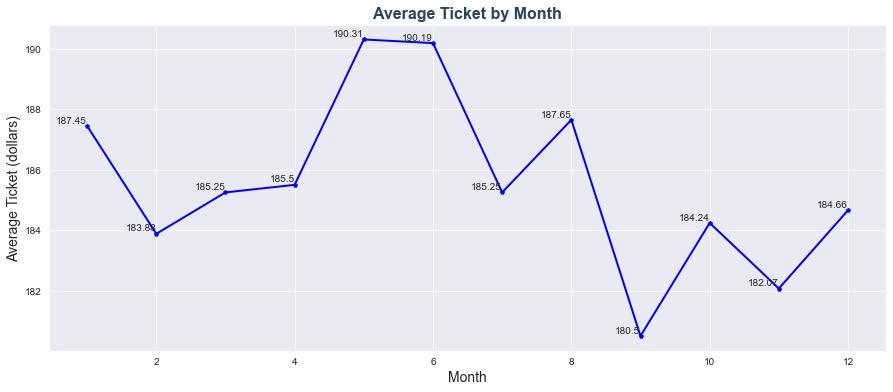

In [75]:
plt.subplots(figsize=(15, 6))

#plt.subplot(1, 2, 1) 
plt.plot(avg_ticket['Month'], avg_ticket['Avg Ticket'], '-p', color='blue', markerfacecolor='blue', 
             markersize=4, linewidth=2) 
plt.title('Average Ticket by Month', fontsize=16, fontweight='bold', color='#2A445E') 
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Average Ticket (dollars)', fontsize=14)

for (i, valor) in enumerate (avg_ticket['Avg Ticket'], start=0):
    plt.text(x=avg_ticket['Month'][i], y=valor + 0.1, s=f'{valor}', ha='right')

**Results:** The average ticket amount for the year was 185.00, with the highest values in the months of May and June, at around 190.00.

## 2.2 How were the sales throughout the year?

In [42]:
sales_by_month = df_3[['Month', 'Sales']].groupby('Month').agg(lambda x: sum(x)).reset_index()
sales_by_month['Sales Growth %'] = round(sales_by_month.Sales.pct_change() * 100, 1)
sales_by_month

,Month,Sales,Sales Growth %
0,1,1.813586e+06,NaN
1,2,2.202022e+06,21.4
2,3,2.807100e+06,27.5
3,4,3.390670e+06,20.8
4,5,3.152607e+06,-7.0
5,6,2.577802e+06,-18.2
6,7,2.647776e+06,2.7
7,8,2.244468e+06,-15.2
8,9,2.097560e+06,-6.5
9,10,3.736727e+06,78.1


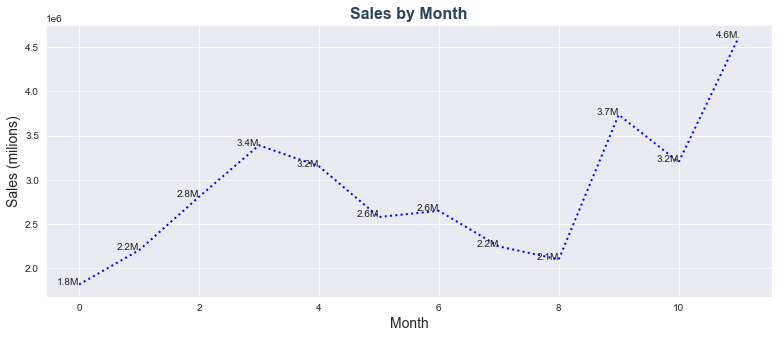

In [70]:
plt.subplots(figsize=(13, 5))
 
plt.plot(sales_by_month['Sales'], 'b', linewidth=2, linestyle=':') 
plt.title('Sales by Month', fontsize=16, fontweight='bold', color='#2A445E') 
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Sales (milions)', fontsize=14)

for (i, valor) in enumerate (sales_by_month['Sales'], start=0):
    plt.text(x=sales_by_month['Month'][i] - 1,
             y=valor + 5,
             s='{:,.1f}M'.format(sales_by_month['Sales'].values[i]/1000000),
             ha='right') 
plt.show()

**Results:** Although the year ended with a significant increase compared to the beginning of the period, sales were unstable throughout 2019, showing periods of sales increase followed by long periods of decline.

We can observe an increase in sales of around 23.2% per month in the period from January to April 2019. The months of May and September are followed by constant declines, especially in June (-18.2%) and August (-15.2%). The month of October showed a significant growth of 78.1%, with revenues rising from 2.1M to 3.7M. November presented a new drop of 14.4%, closing the year with the highest turnover of the year at 4.6M.

**Recommendation:** Investigate the cause of the extended sales decreases. As we only have one year's worth of information collected, we cannot yet say whether this pattern will repeat itself in the coming years

## 2.3 Which location had the highest number of sales?

In [72]:
sales_by_city = df_3[['Location', 'Sales']].groupby('Location').agg(lambda x: sum(x)).sort_values(by='Sales', ascending=False).reset_index()
sales_by_city['%'] = round((sales_by_city['Sales'] / sales_by_city['Sales'].sum()) * 100, 1)
sales_by_city

,Location,Sales,%
0,San Francisco- CA,8.259719e+06,24.0
1,Los Angeles- CA,5.451571e+06,15.8
2,New York City- NY,4.662977e+06,13.5
3,Boston- MA,3.660315e+06,10.6
4,Atlanta- GA,2.795499e+06,8.1
5,Dallas- TX,2.766260e+06,8.0
6,Seattle- WA,2.747605e+06,8.0
7,Portland- OR,1.870579e+06,5.4
8,Austin- TX,1.819082e+06,5.3
9,Portland- ME,4.497583e+05,1.3


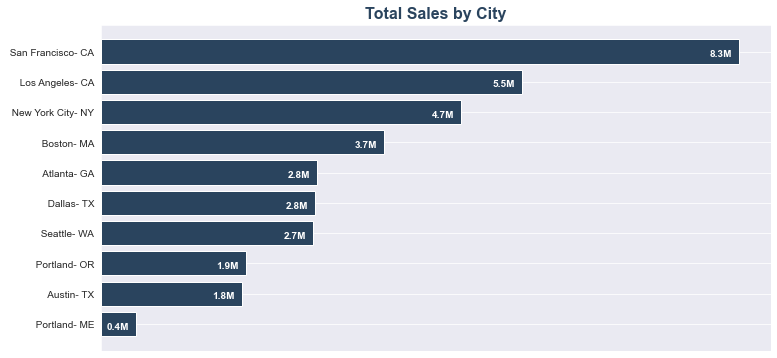

In [25]:
fig,ax = plt.subplots(figsize=(12,6))

ax.barh(sales_by_city['Location'], sales_by_city['Sales'].values, color='#2A445E')

for i in range(0,10):
    ax.annotate('{:,.1f}M'.format(sales_by_city['Sales'].values[i]/1000000), (sales_by_city['Sales'].values[i], i), 
                ha="center",
                va="top", # Alinhamento vertical do texto
                xytext=(-18,2), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="white") # Cor dos rótulos
    
ax.invert_yaxis() #inverter o eixo y e ficar do maior para o menor
ax.set_title('Total Sales by City', fontsize=16, fontweight='bold', color='#2A445E')
ax.xaxis.set_visible(False) # Retirando os valores do eixo y

plt.show()

**Results:** The state of California represents the largest share of sales, with about 40% of the total. San Francisco reached 24% of sales, even though it has a population that represents 4.7% of the analyzed cities, followed by Los Angeles with 16% of sales.

New York, which has the largest population among those analyzed, reached 13.5% of sales, followed by Boston with 10.6%. Portland, Maine, represents only 1.3% of sales, but it is the smallest city among those analyzed, with an estimated population of 68 thousand inhabitants.

**Recommendation:** Reinforce marketing in New York, which has a very large potential market and could be further explored, considering the number of inhabitants, and purchasing power.

## 2.4 What products are most often sold?

In [73]:
product_sales = df_3[['Product', 'Sales','Quantity Ordered']].groupby('Product').agg(lambda x: sum(x)).sort_values(by='Sales', ascending=False).reset_index()
product_sales['% Sales'] = round((product_sales['Sales'] / product_sales['Sales'].sum()) * 100, 1)
product_sales['% Quantity'] = round((product_sales['Quantity Ordered'] / product_sales['Quantity Ordered'].sum()) * 100, 1)
product_sales

,Product,Sales,Quantity Ordered,% Sales,% Quantity
0,Macbook Pro Laptop,8035900.00,4727,23.3,2.3
1,iPhone,4792900.00,6847,13.9,3.3
2,ThinkPad Laptop,4127958.72,4128,12.0,2.0
3,Google Phone,3318600.00,5531,9.6,2.6
4,27in 4K Gaming Monitor,2434707.57,6243,7.1,3.0
5,34in Ultrawide Monitor,2355558.01,6199,6.8,3.0
6,Apple Airpods Headphones,2348550.00,15657,6.8,7.5
7,Flatscreen TV,1445400.00,4818,4.2,2.3
8,Bose SoundSport Headphones,1345265.46,13454,3.9,6.4
9,27in FHD Monitor,1131974.53,7547,3.3,3.6


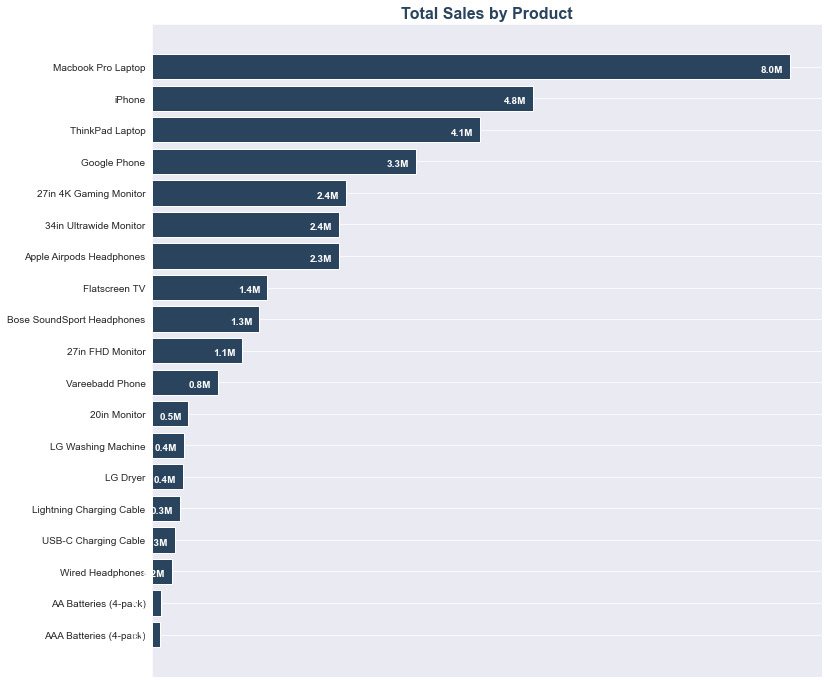

In [27]:
fig,ax = plt.subplots(figsize=(12,12))

ax.barh(product_sales['Product'], product_sales['Sales'].values, color='#2A445E')

for i in range(0,19):
    ax.annotate('{:,.1f}M'.format(product_sales['Sales'].values[i]/1000000), (product_sales['Sales'].values[i], i), 
                ha="center",
                va="top", # Alinhamento vertical do texto
                xytext=(-18,2), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="white") # Cor dos rótulos
    
ax.invert_yaxis() #inverter o eixo y e ficar do maior para o menor
ax.set_title('Total Sales by Product', fontsize=16, fontweight='bold', color='#2A445E')
ax.xaxis.set_visible(False) # Retirando os valores do eixo y

plt.show()

**Results:** Almost half of all sales are concentrated in the three most expensive products: the MacBook Pro laptop (23.3%), the iPhone (13.9%), and the ThinkPad laptop (12.3%). An average of 5200 units of each product were sold.

In terms of units sold, the largest quantities were cables, wired headphones, and batteries, at around 25,000 units each. These goods sold in large quantities because they were the least expensive.

## 2.5 What products are most often sold together?

In [30]:
# create a nem dataframe to separate the duplicated values of Order ID
sold_together = df_2[df_2['Order ID'].duplicated(keep=False)]

# joining few products with the same Order ID into the same line
sold_together['Grouped'] = df_2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Dropping the duplcated values
sold_together = sold_together[['Order ID', 'Grouped']].drop_duplicates()

# Counting the pair of products
# create a new variable for Counter
count = Counter()

# make a for loop
for row in sold_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

df_together = pd.DataFrame(count.items(), 
                columns=['Products Sold together', 'Quantity']).sort_values(by='Quantity', ascending=False)
df_together['% Quantity'] = round((df_together['Quantity'] / df_together['Quantity'].sum()) * 100, 1)

df_together.head(5)

,Products Sold together,Quantity,% Quantity
8,"(iPhone, Lightning Charging Cable)",1004,12.7
1,"(Google Phone, USB-C Charging Cable)",987,12.5
13,"(iPhone, Wired Headphones)",447,5.7
0,"(Google Phone, Wired Headphones)",414,5.2
22,"(Vareebadd Phone, USB-C Charging Cable)",361,4.6


**Results:** The top 5 best-selling products together are cell phones with chargers or headphones, which account for about 40% of sales.

**Recommendation:** Implement marketing campaigns for these items at the same time, with the option of recommending group purchases of products on the website.

## 2.6 What time should we display adverstisement to maximize likelihood of customer's buying product?

In [74]:
# data used in this section
sales_by_hour = pd.concat([df_3.groupby(['Hour']).count()['Order ID'], 
                       df_3.groupby(['Hour']).sum()[['Sales', 'Quantity Ordered']]], axis=1).reset_index()
sales_by_hour.columns = ['Hour', 'Number of Orders','Quantity Ordered', 'Total Sales']
sales_by_hour

,Hour,Number of Orders,Quantity Ordered,Total Sales
0,0,3898,711060.59,4412
1,1,2341,458561.97,2610
2,2,1239,232586.50,1394
3,3,828,144697.99,922
4,4,850,162396.09,933
5,5,1319,230564.88,1491
6,6,2482,448113.00,2810
7,7,4011,744854.12,4556
8,8,6256,1192348.97,7002
9,9,8748,1639030.58,9816


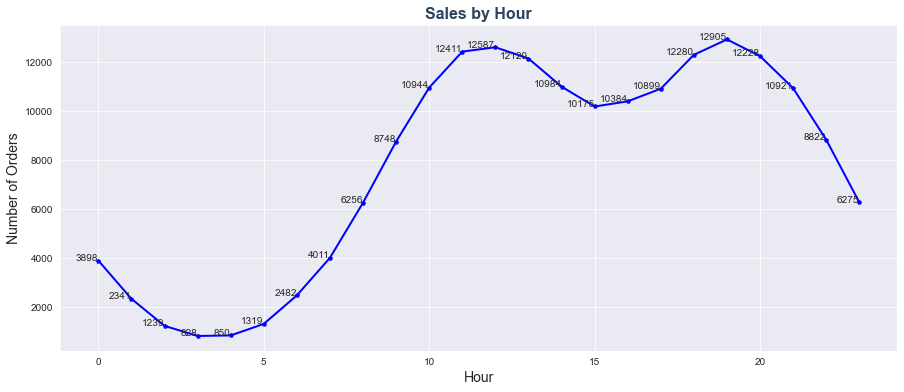

In [36]:
plt.subplots(figsize=(15, 6))

plt.plot(sales_by_hour['Hour'], sales_by_hour['Number of Orders'], '-p', color='blue', markerfacecolor='blue', markersize=4, linewidth=2, label = 'Number of Orders') 
plt.title('Sales by Hour', fontsize=16, fontweight='bold', color='#2A445E') 
plt.xlabel('Hour', fontsize=14) 
plt.ylabel('Number of Orders', fontsize=14)

for (i, valor) in enumerate (sales_by_hour['Number of Orders'], start=0):
    plt.text(x=sales_by_hour['Hour'][i], y=valor + 8, s=f'{valor}', ha='right')

**Results:** More than 60% of sales are concentrated between 11 a.m. and 8 p.m., with the peak of sales occurring at 7 p.m., accounting for 7% of sales. 

**Recommendation:** This early evening time is the most recommended time for advertising.

# Conclusions

According to the data analyzed, we can see that most sales are concentrated in the state of California (40%), which despite having a much smaller population than New York, has a much greater purchasing power compared to other locations. It is recommended to intensify marketing campaigns in this region, especially for Apple products, which can result in a higher sales value.

The products that are best sold together are cell phones and their accessories. It is recommended to intensify the simultaneous announcement of these products.

We observed that sales throughout the year had considerable fluctuations, even having closed the year with a positive leap. A more accurate investigation is recommended to understand the reason for this behavior, especially in the period from May to September.

## References

* Dataset: <a href="https://www.kaggle.com/datasets/knightbearr/sales-product-data">Kaggle</a>

* Per Capita Personal Income of US cities:  <a href="https://www.census.gov/quickfacts/fact/table/portlandcitymaine,bostoncitymassachusetts/HSG010221">Census</a> and <a href="https://en.wikipedia.org/wiki/List_of_U.S._cities_by_adjusted_per_capita_personal_income">Wikipedia</a>

* List of US cities by population: <a href="https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population">Wikipedia</a>
    